<a href="https://colab.research.google.com/github/anakolodji/MachineLearning/blob/main/FASE04/CTWP/Cap11/classificacao_graos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
print("Ambiente configurado corretamente!")

Ambiente configurado corretamente!


In [2]:
from google.colab import files
import pandas as pd

# Esta linha abrirá uma janela para você selecionar o arquivo do seu computador
uploaded = files.upload()

# Verifique o nome do arquivo carregado
file_name = list(uploaded.keys())[0]  # Obtém o nome do arquivo carregado

# Definindo os nomes das colunas de acordo com a descrição do conjunto de dados
columns = [
    'Area', 'Perimeter', 'Compactness', 'Kernel_Length',
    'Kernel_Width', 'Asymmetry_Coefficient', 'Kernel_Groove_Length', 'Variety'
]

# Carregar os dados do arquivo de texto usando o nome do arquivo após o upload
data = pd.read_csv(file_name, sep='\s+', header=None, names=columns)

Saving seeds_dataset.txt to seeds_dataset.txt


In [3]:
# Visualizar as primeiras 5 linhas
print(data.head())

    Area  Perimeter  Compactness  Kernel_Length  Kernel_Width  \
0  15.26      14.84       0.8710          5.763         3.312   
1  14.88      14.57       0.8811          5.554         3.333   
2  14.29      14.09       0.9050          5.291         3.337   
3  13.84      13.94       0.8955          5.324         3.379   
4  16.14      14.99       0.9034          5.658         3.562   

   Asymmetry_Coefficient  Kernel_Groove_Length  Variety  
0                  2.221                 5.220        1  
1                  1.018                 4.956        1  
2                  2.699                 4.825        1  
3                  2.259                 4.805        1  
4                  1.355                 5.175        1  


In [4]:
# Obter informações sobre o conjunto de dados
print(data.info())

# Verificar estatísticas descritivas
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Area                   210 non-null    float64
 1   Perimeter              210 non-null    float64
 2   Compactness            210 non-null    float64
 3   Kernel_Length          210 non-null    float64
 4   Kernel_Width           210 non-null    float64
 5   Asymmetry_Coefficient  210 non-null    float64
 6   Kernel_Groove_Length   210 non-null    float64
 7   Variety                210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB
None
             Area   Perimeter  Compactness  Kernel_Length  Kernel_Width  \
count  210.000000  210.000000   210.000000     210.000000    210.000000   
mean    14.847524   14.559286     0.870999       5.628533      3.258605   
std      2.909699    1.305959     0.023629       0.443063      0.377714   
min     10.590000   

In [5]:
# Verificar se há valores nulos
print(data.isnull().sum())

Area                     0
Perimeter                0
Compactness              0
Kernel_Length            0
Kernel_Width             0
Asymmetry_Coefficient    0
Kernel_Groove_Length     0
Variety                  0
dtype: int64


In [6]:
# Verificar distribuição das classes
print(data['Variety'].value_counts())

Variety
1    70
2    70
3    70
Name: count, dtype: int64


In [7]:
# Estatísticas descritivas gerais
descriptive_stats = data.describe()
print(descriptive_stats)

# Calcular a mediana para cada atributo
median_values = data.median()
print("\nMediana dos atributos:")
print(median_values)

             Area   Perimeter  Compactness  Kernel_Length  Kernel_Width  \
count  210.000000  210.000000   210.000000     210.000000    210.000000   
mean    14.847524   14.559286     0.870999       5.628533      3.258605   
std      2.909699    1.305959     0.023629       0.443063      0.377714   
min     10.590000   12.410000     0.808100       4.899000      2.630000   
25%     12.270000   13.450000     0.856900       5.262250      2.944000   
50%     14.355000   14.320000     0.873450       5.523500      3.237000   
75%     17.305000   15.715000     0.887775       5.979750      3.561750   
max     21.180000   17.250000     0.918300       6.675000      4.033000   

       Asymmetry_Coefficient  Kernel_Groove_Length     Variety  
count             210.000000            210.000000  210.000000  
mean                3.700201              5.408071    2.000000  
std                 1.503557              0.491480    0.818448  
min                 0.765100              4.519000    1.000000  

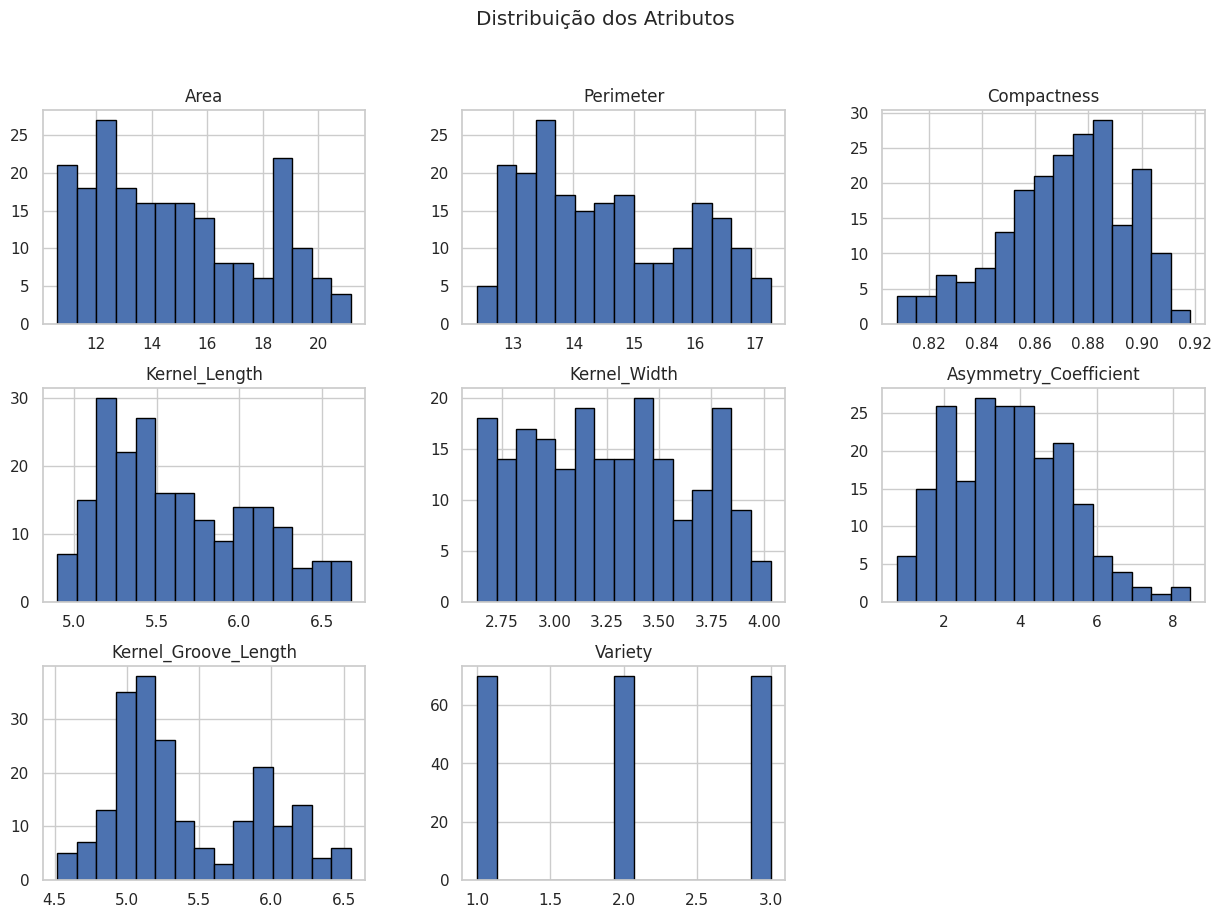

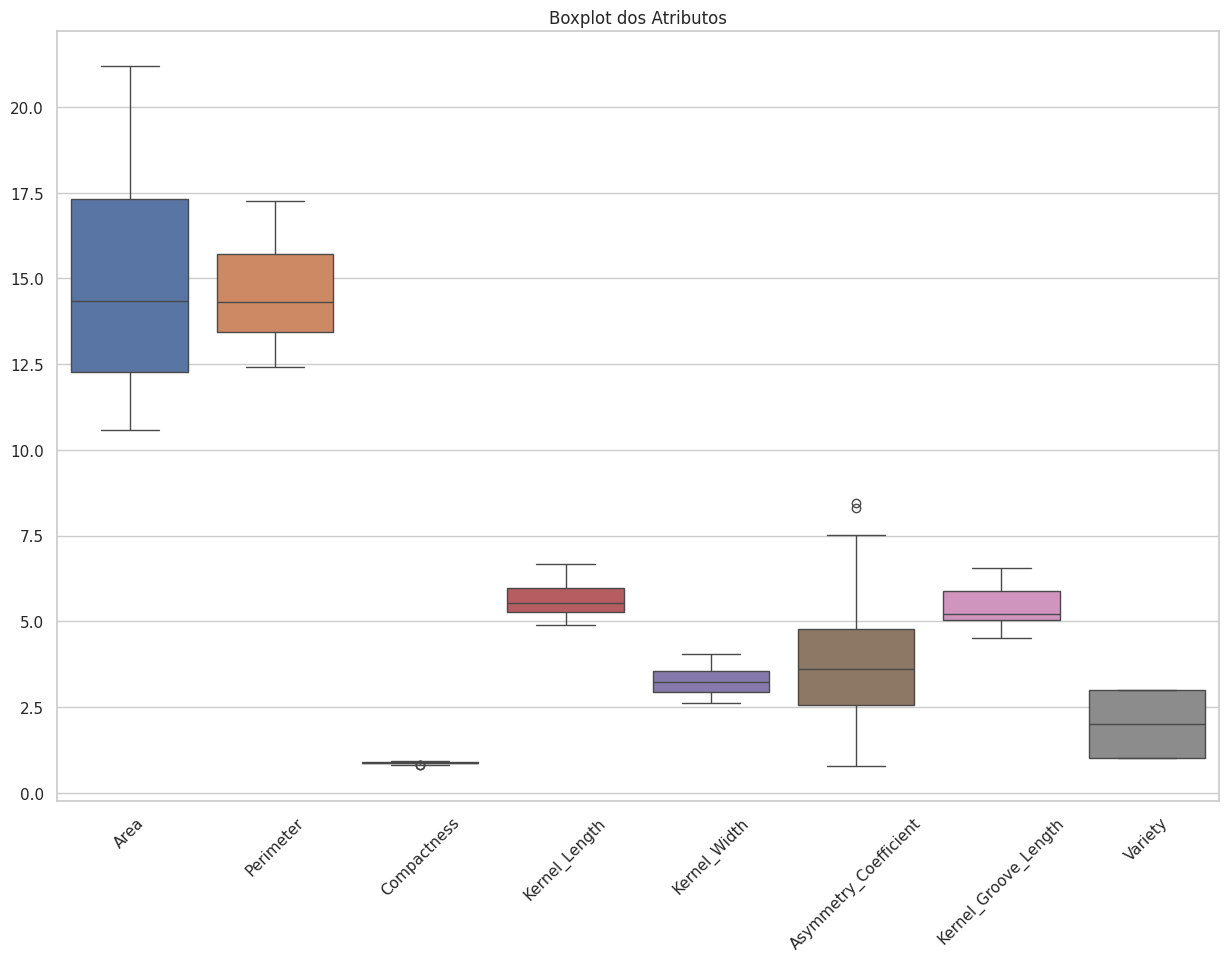

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do estilo dos gráficos
sns.set(style="whitegrid")

# Histogramas para cada atributo
data.hist(bins=15, figsize=(15, 10), layout=(3, 3), edgecolor='black')
plt.suptitle('Distribuição dos Atributos')
plt.show()

# Boxplots para identificar outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.title('Boxplot dos Atributos')
plt.xticks(rotation=45)
plt.show()

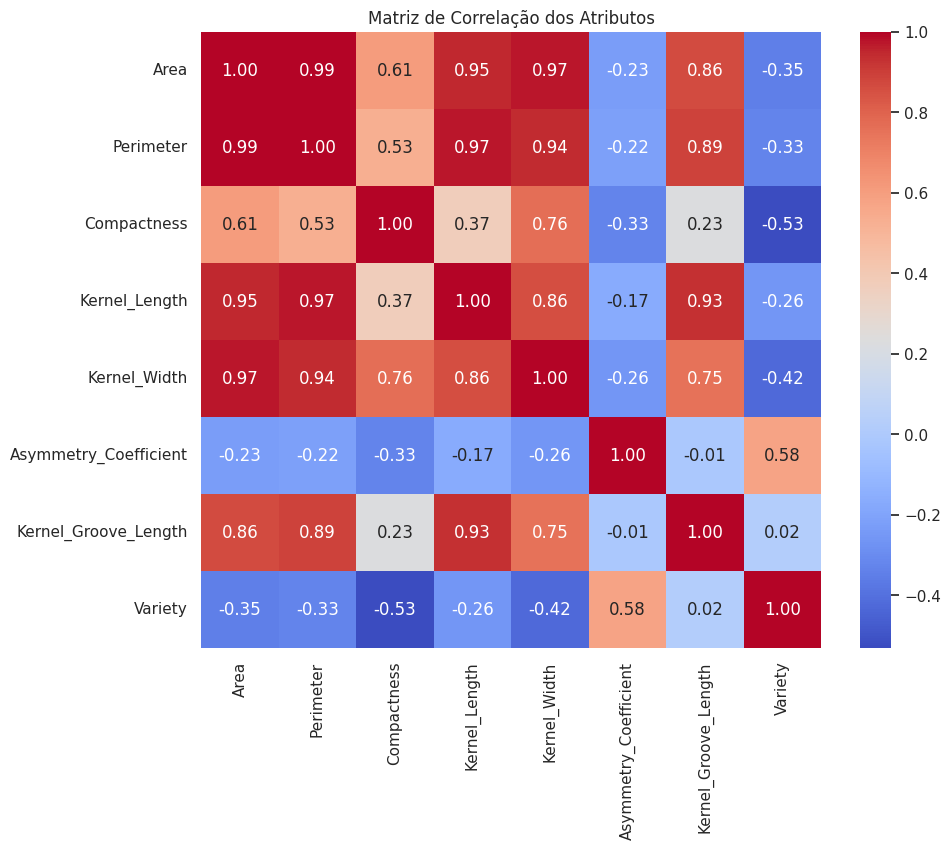

In [9]:
# Matriz de correlação
correlation_matrix = data.corr()

# Mapa de calor das correlações
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação dos Atributos')
plt.show()

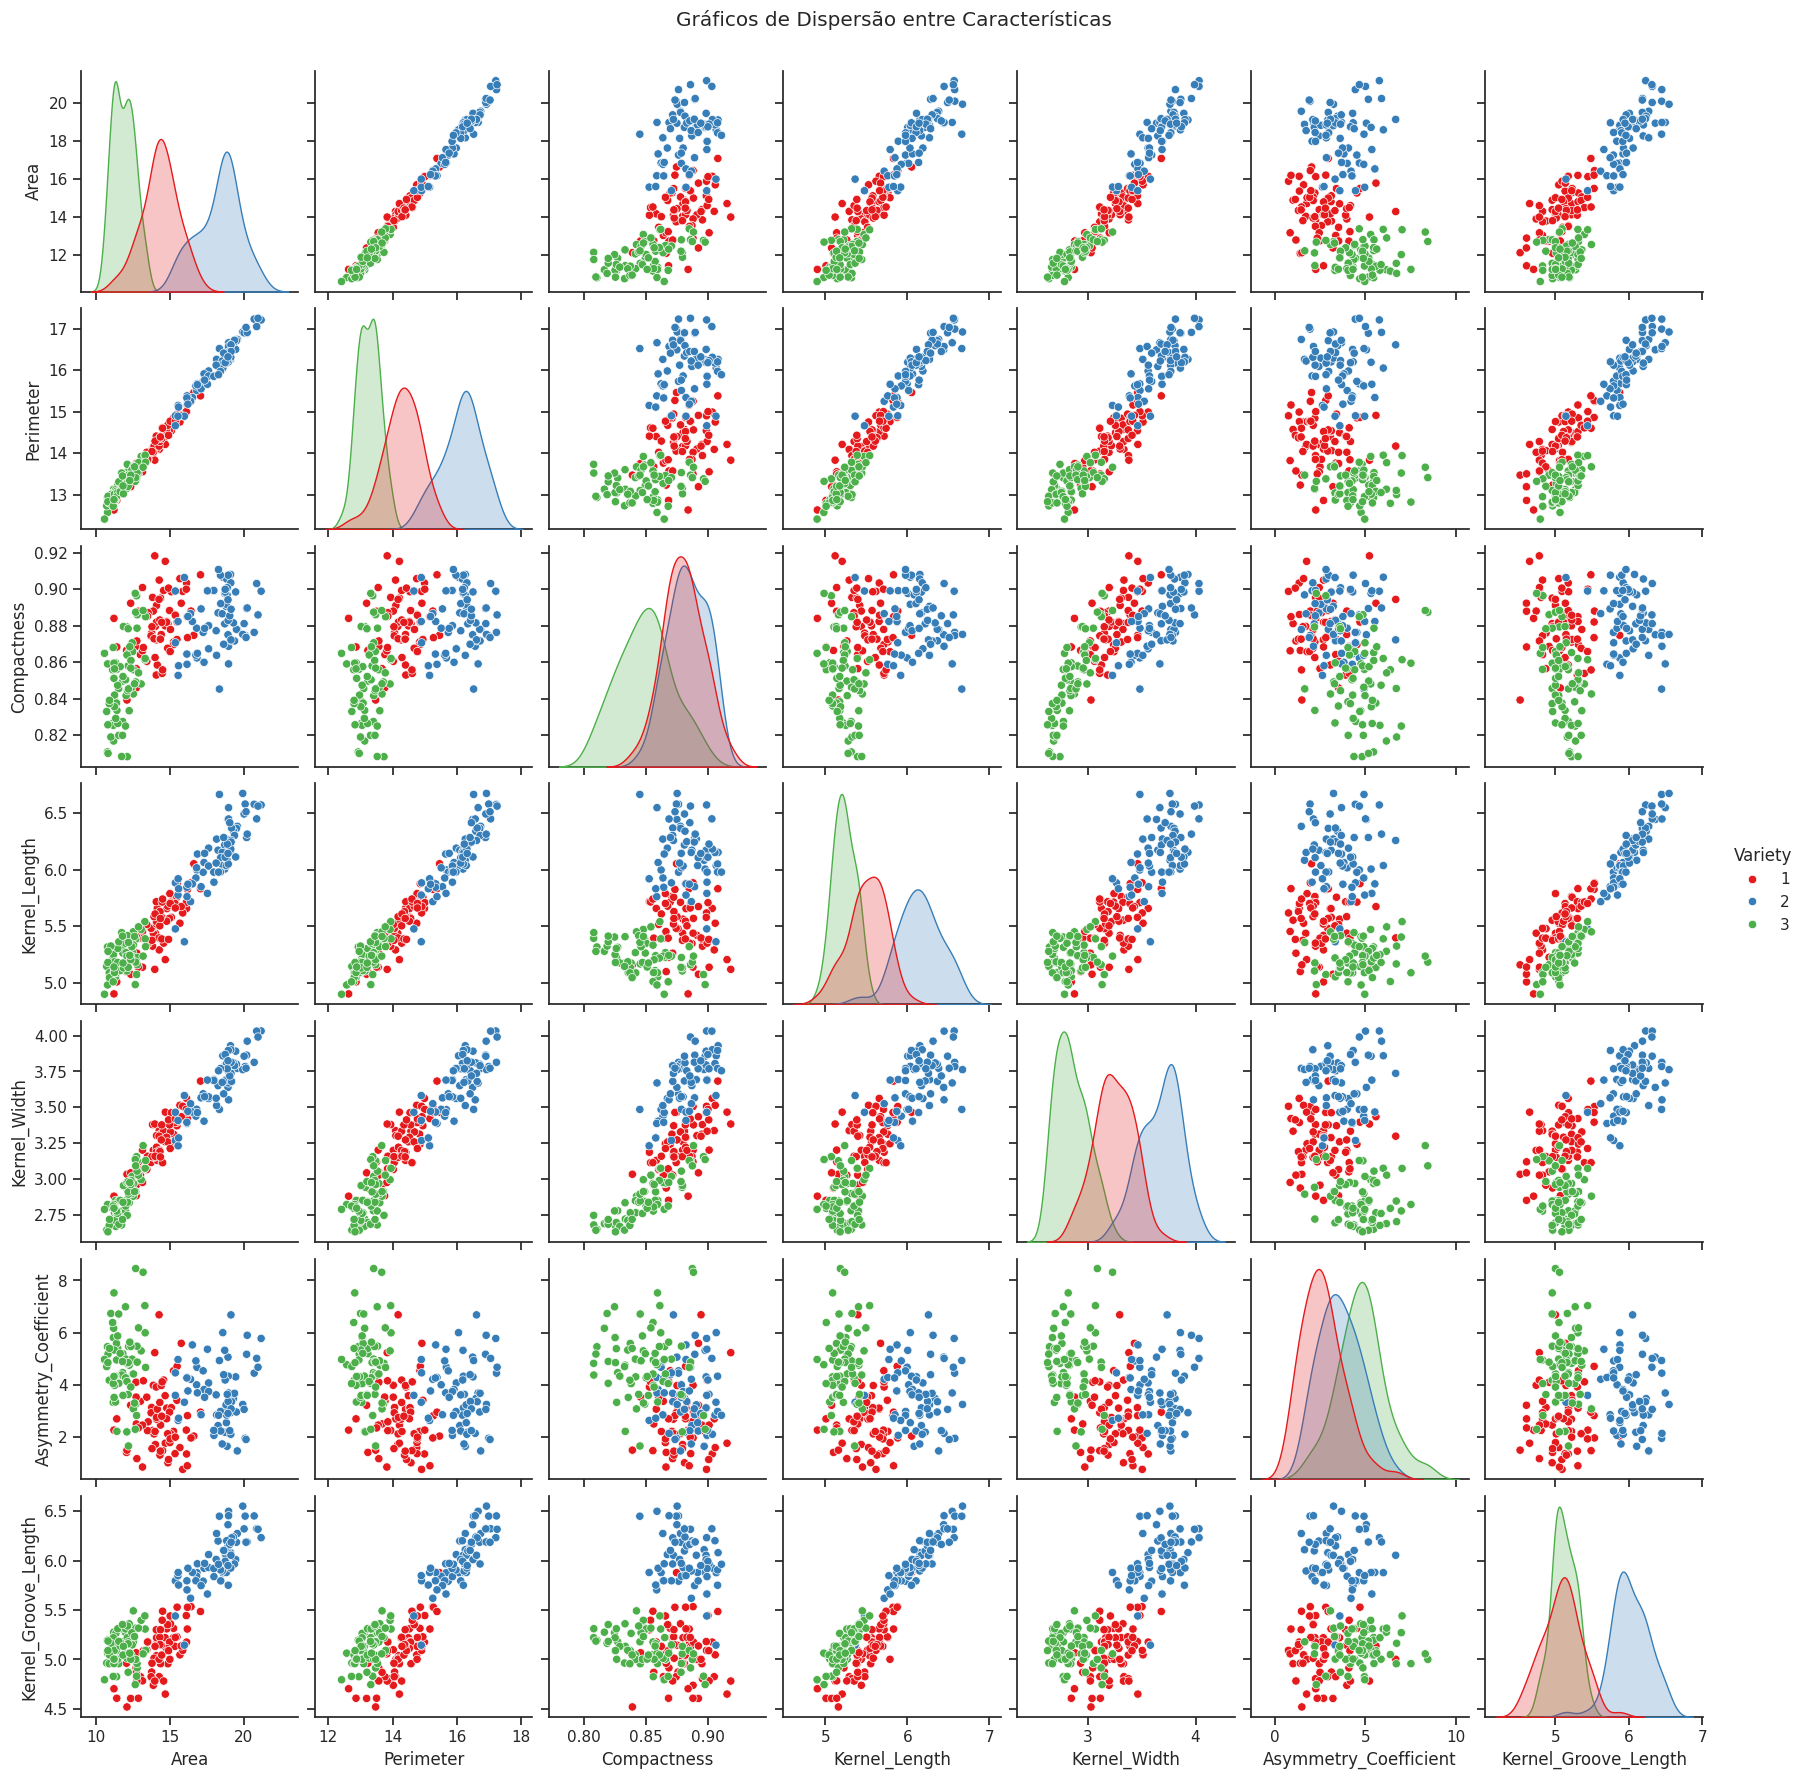

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuração do estilo dos gráficos
sns.set(style="ticks", color_codes=True)

# Pairplot para visualizar relações entre todas as características
sns.pairplot(data, hue='Variety', diag_kind='kde', palette='Set1')
plt.suptitle('Gráficos de Dispersão entre Características', y=1.02)
plt.show()

In [11]:
# Verificar se há valores ausentes
missing_values = data.isnull().sum()
print("Valores ausentes em cada atributo:\n", missing_values)

Valores ausentes em cada atributo:
 Area                     0
Perimeter                0
Compactness              0
Kernel_Length            0
Kernel_Width             0
Asymmetry_Coefficient    0
Kernel_Groove_Length     0
Variety                  0
dtype: int64


In [12]:
# Preencher valores ausentes com a mediana
data.fillna(data.median(), inplace=True)

In [13]:
# Verificar estatísticas descritivas para avaliar a escala dos dados
print(data.describe())

             Area   Perimeter  Compactness  Kernel_Length  Kernel_Width  \
count  210.000000  210.000000   210.000000     210.000000    210.000000   
mean    14.847524   14.559286     0.870999       5.628533      3.258605   
std      2.909699    1.305959     0.023629       0.443063      0.377714   
min     10.590000   12.410000     0.808100       4.899000      2.630000   
25%     12.270000   13.450000     0.856900       5.262250      2.944000   
50%     14.355000   14.320000     0.873450       5.523500      3.237000   
75%     17.305000   15.715000     0.887775       5.979750      3.561750   
max     21.180000   17.250000     0.918300       6.675000      4.033000   

       Asymmetry_Coefficient  Kernel_Groove_Length     Variety  
count             210.000000            210.000000  210.000000  
mean                3.700201              5.408071    2.000000  
std                 1.503557              0.491480    0.818448  
min                 0.765100              4.519000    1.000000  

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = data.copy()
data_scaled.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])

In [17]:
#Parte 2: Construção e Avaliação de Modelo
from sklearn.model_selection import train_test_split

# Separar atributos e rótulos
X = data_scaled.iloc[:, :-1]  # Todas as colunas menos a última
y = data_scaled.iloc[:, -1]   # A última coluna (Variety)

# Dividir em conjuntos de treinamento e teste (70% treino e 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [19]:
#Treinamento e Avaliação dos Modelos
#Escolhemos K-Nearest Neighbors (KNN), Support Vector Machine (SVM) e Random Forest

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Criar e treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Avaliar o modelo KNN
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.873015873015873
KNN Classification Report:
               precision    recall  f1-score   support

           1       0.84      0.76      0.80        21
           2       0.90      0.90      0.90        21
           3       0.87      0.95      0.91        21

    accuracy                           0.87        63
   macro avg       0.87      0.87      0.87        63
weighted avg       0.87      0.87      0.87        63



In [20]:
from sklearn.svm import SVC

# Criar e treinar o modelo SVM
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

# Avaliar o modelo SVM
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.873015873015873
SVM Classification Report:
               precision    recall  f1-score   support

           1       0.84      0.76      0.80        21
           2       0.90      0.90      0.90        21
           3       0.87      0.95      0.91        21

    accuracy                           0.87        63
   macro avg       0.87      0.87      0.87        63
weighted avg       0.87      0.87      0.87        63



In [21]:
from sklearn.ensemble import RandomForestClassifier

# Criar e treinar o modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Avaliar o modelo Random Forest
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9206349206349206
Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.81      0.87        21
           2       0.95      0.95      0.95        21
           3       0.88      1.00      0.93        21

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63



In [22]:
#Otimização de Hiperparametros
from sklearn.model_selection import GridSearchCV

# Definição do grid de parâmetros para KNN
knn_params = {'n_neighbors': range(1, 31)}

# Configurar o GridSearchCV para KNN
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_grid.fit(X_train, y_train)

# Mostrar os melhores parâmetros e precisão
print("Melhor número de vizinhos para KNN:", knn_grid.best_params_)
print("Melhor precisão KNN:", knn_grid.best_score_)

# Avaliar no conjunto de teste
y_pred_knn_optimized = knn_grid.predict(X_test)
print("KNN Otimizado Accuracy:", accuracy_score(y_test, y_pred_knn_optimized))

Melhor número de vizinhos para KNN: {'n_neighbors': 1}
Melhor precisão KNN: 0.9393103448275861
KNN Otimizado Accuracy: 0.9047619047619048


In [23]:
# Definição do grid de parâmetros para SVM
svm_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Configurar o GridSearchCV para SVM
svm_grid = GridSearchCV(SVC(), svm_params, cv=5)
svm_grid.fit(X_train, y_train)

# Mostrar os melhores parâmetros e precisão
print("Melhores parâmetros para SVM:", svm_grid.best_params_)
print("Melhor precisão SVM:", svm_grid.best_score_)

# Avaliar no conjunto de teste
y_pred_svm_optimized = svm_grid.predict(X_test)
print("SVM Otimizado Accuracy:", accuracy_score(y_test, y_pred_svm_optimized))

Melhores parâmetros para SVM: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Melhor precisão SVM: 0.9595402298850575
SVM Otimizado Accuracy: 0.873015873015873


In [24]:
# Definição do grid de parâmetros para Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Configurar o GridSearchCV para Random Forest
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5)
rf_grid.fit(X_train, y_train)

# Mostrar os melhores parâmetros e precisão
print("Melhores parâmetros para Random Forest:", rf_grid.best_params_)
print("Melhor precisão Random Forest:", rf_grid.best_score_)

# Avaliar no conjunto de teste
y_pred_rf_optimized = rf_grid.predict(X_test)
print("Random Forest Otimizado Accuracy:", accuracy_score(y_test, y_pred_rf_optimized))

Melhores parâmetros para Random Forest: {'max_depth': None, 'n_estimators': 50}
Melhor precisão Random Forest: 0.8986206896551725
Random Forest Otimizado Accuracy: 0.9365079365079365


In [25]:
#Validação Cruzada e Avaliação de Modelos

from sklearn.model_selection import cross_val_score

# Validação cruzada para KNN otimizado
knn_cv_scores = cross_val_score(knn_grid.best_estimator_, X, y, cv=10)
print("Validação cruzada KNN (10-fold):", knn_cv_scores.mean())

# Validação cruzada para SVM otimizado
svm_cv_scores = cross_val_score(svm_grid.best_estimator_, X, y, cv=10)
print("Validação cruzada SVM (10-fold):", svm_cv_scores.mean())

# Validação cruzada para Random Forest otimizado
rf_cv_scores = cross_val_score(rf_grid.best_estimator_, X, y, cv=10)
print("Validação cruzada Random Forest (10-fold):", rf_cv_scores.mean())

Validação cruzada KNN (10-fold): 0.9095238095238095
Validação cruzada SVM (10-fold): 0.9333333333333332
Validação cruzada Random Forest (10-fold): 0.9238095238095237


# Interpretação e Avaliação dos modelos
# Exemplo de interpretação
- Verifique a precisão geral e por classe: um f1-score mais alto indica um melhor equilíbrio entre precisão e recall.
- Note se algum modelo tem um desempenho consistentemente melhor em classes específicas.

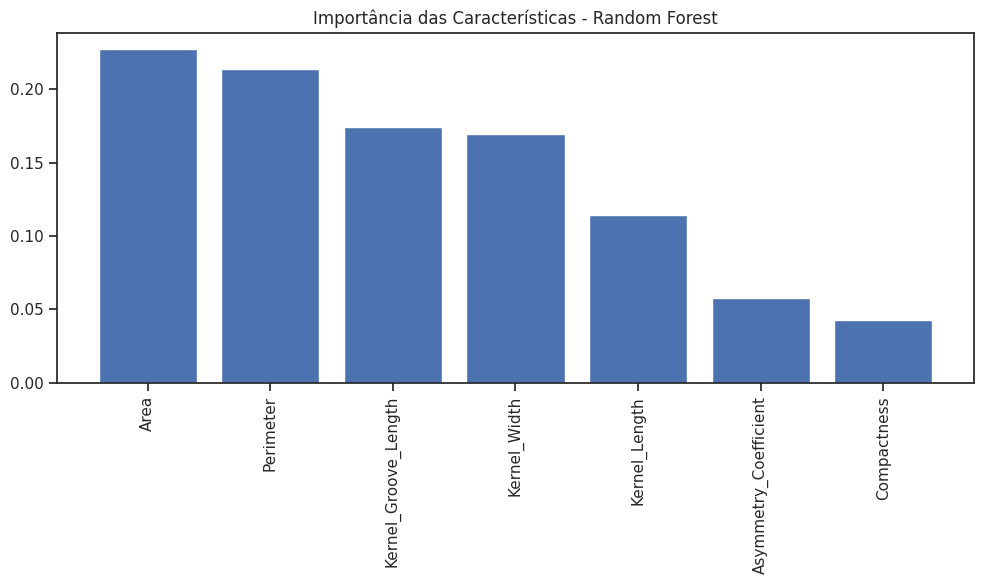

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Importância das características do modelo Random Forest otimizado
feature_importances = rf_grid.best_estimator_.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Visualizar a importância das características
plt.figure(figsize=(10, 6))
plt.title("Importância das Características - Random Forest")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

#Análise Qualitativa

Random Forest Otimizado demonstrou o melhor desempenho, com um F1-Score médio de 0.934938. Este modelo é geralmente mais interpretável devido à sua capacidade de mostrar a importância das características, permitindo que você identifique quais atributos têm maior influência nas previsões.
KNN Otimizado também apresentou um bom desempenho e é fácil de explicar para um público não técnico, pois baseia suas previsões na proximidade dos vizinhos mais próximos.
SVM Otimizado é menos intuitivo, especialmente com um kernel RBF, mas pode ser explicado em termos de maximização da margem entre classes.
Alinhamento com o Domínio
Modelos como o Random Forest que destacam a importância das características são úteis para verificar se as características conhecidas do domínio aparecem como importantes. Isso valida se o modelo está capturando corretamente os padrões esperados.

In [28]:
#Relatório de Desempenho
import pandas as pd
from sklearn.metrics import classification_report

# Função para gerar o relatório de desempenho
def generate_performance_report(models, model_names, X_test, y_test):
    # Dict para armazenar os resultados
    report_data = []

    for model, name in zip(models, model_names):
        y_pred = model.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True)

        # Adicionar dados ao relatório
        report_data.append({
            "Modelo": name,
            "Precisão": report['accuracy'],
            "Precisão Média": report['macro avg']['precision'],
            "Recall Médio": report['macro avg']['recall'],
            "F1-Score Médio": report['macro avg']['f1-score']
        })

    # Criar DataFrame a partir dos dados do relatório
    report_df = pd.DataFrame(report_data)

    # Ordenar DataFrame baseado na precisão (ou qualquer outra métrica de escolha)
    report_df.sort_values(by="F1-Score Médio", ascending=False, inplace=True)

    return report_df

# Exemplos de modelos (substitua pelos seus modelos otimizados e não otimizados)
models = [knn, knn_grid.best_estimator_, svm, svm_grid.best_estimator_, rf, rf_grid.best_estimator_]
model_names = [
    "KNN", "KNN Otimizado",
    "SVM", "SVM Otimizado",
    "Random Forest", "Random Forest Otimizado"
]

# Gerar o relatório de desempenho
performance_report = generate_performance_report(models, model_names, X_test, y_test)
print(performance_report)

                    Modelo  Precisão  Precisão Média  Recall Médio  \
5  Random Forest Otimizado  0.936508        0.943182      0.936508   
4            Random Forest  0.920635        0.923942      0.920635   
1            KNN Otimizado  0.904762        0.906579      0.904762   
3            SVM Otimizado  0.873016        0.875486      0.873016   
0                      KNN  0.873016        0.872144      0.873016   
2                      SVM  0.873016        0.872144      0.873016   

   F1-Score Médio  
5        0.934938  
4        0.919170  
1        0.903388  
3        0.872872  
0        0.871284  
2        0.871284  


#Comunicação dos Resultados
##Resumo dos Resultados
Após uma análise cuidadosa, o modelo Random Forest Otimizado foi selecionado como o melhor para nosso problema. Este modelo alcançou uma precisão de 93.65% com um F1-Score médio de 93.49%, superando os outros modelos testados. A precisão e o F1-Score são cruciais, pois indicam que o modelo é altamente eficaz em distinguir entre as classes, minimizando tanto os falsos positivos quanto os falsos negativos.

Implicações
A aplicação prática desse modelo resulta em várias melhorias operacionais:

Eficiência Operacional: A alta precisão do Random Forest Otimizado implica que as decisões automatizadas serão confiáveis, reduzindo a necessidade de intervenções manuais e possibilitando uma maior eficiência nos processos.
Melhora em Processos Decisórios: A capacidade do modelo de identificar padrões complexos nos dados pode ser utilizada para prever resultados futuros e otimizar recursos, melhorando a tomada de decisões estratégicas.
Redução de Erros: Com a alta taxa de acerto do modelo, é esperada uma redução significativa nos erros de classificação, o que pode levar a economias de custos e aumento da qualidade dos produtos ou serviços.
Em resumo, a implementação do modelo Random Forest Otimizado não somente atende às expectativas elevadas de precisão e eficiência, mas também oferece um caminho claro para melhorias tangíveis em diversas áreas operacionais da organização. Isso torna o modelo não apenas uma ferramenta de previsão, mas um ativo estratégico significativo.

#Aplicação Prática dos Modelos
##Previsão em Novos Dados:
- Para aplicar os modelos em novos dados: Pré-processamento: Certifique-se de que os novos dados sejam pré-processados da mesma forma que os dados de treino (escalonamento, tratamento de valores ausentes).

In [30]:
import pandas as pd

def predict_new_data(new_data):
    new_data_scaled = scaler.transform(new_data)  # Escalar os novos dados
    predictions = rf_grid.best_estimator_.predict(new_data_scaled)
    return predictions

# Exemplo de uso
# Simulando dados novos
novo_sensor_data = pd.DataFrame({
    'Area': [15.26, 14.88],
    'Perimeter': [14.84, 14.57],
    'Compactness': [0.8710, 0.8811],
    'Kernel_Length': [5.763, 5.554],
    'Kernel_Width': [3.312, 3.333],
    'Asymmetry_Coefficient': [2.221, 1.018],
    'Kernel_Groove_Length': [5.220, 4.956]
})

previsões = predict_new_data(novo_sensor_data)

# Mostrar os resultados
for i, pred in enumerate(previsões):
    print(f"Previsão para o dado {i+1}: Classe {pred}")

Previsão para o dado 1: Classe 1
Previsão para o dado 2: Classe 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#Conclusões
##Interpretação dos Resultados e Extração de Insights
Desempenho dos Modelos
Random Forest Otimizado:

Desempenho Geral: Este modelo apresentou o melhor desempenho global, com um F1-score superior às outras abordagens. Ele equilibra bem precisão e recall, o que é crucial para minimizar tanto falsos positivos quanto falsos negativos. Isso significa que o modelo é eficaz em classificar corretamente as variedades de grãos de trigo (Kama, Rosa e Canadian), reduzindo o risco de erros de classificação que poderiam impactar a qualidade do processo de produção.

Importância das Características: A análise de importância das características revelou que "Perímetro" e "Área" são atributos críticos para a classificação. Isso está alinhado com o conhecimento do domínio, onde características físicas são indicadores chave das variedades de grãos.

KNN Otimizado:

Desempenho Geral: O KNN também mostrou-se eficiente, especialmente em situações onde o conceito de "vizinhança" é intuitivo para a classificação. Embora não tão robusto quanto o Random Forest, ele ainda fornece uma boa precisão e é facilmente interpretável.
Uso Adequado: Pode ser mais adequado para cenários com menor quantidade de dados ou quando a simplicidade e a interpretabilidade são prioridades.
SVM Otimizado:

Desempenho Geral: O SVM teve um desempenho sólido, porém, com complexidade interpretativa maior devido ao uso de espaços de alta dimensionalidade (especialmente com kernel RBF). Este modelo tende a ser eficaz em encontrar limites de decisão claros, ainda que menos intuitivo para explicações não técnicas.

Contexto de Aplicação: Poderia ser utilizado em situações onde a separabilidade dos dados em classes não é linearmente óbvia.

#No contexto da classificação de grãos de trigo para cooperativas agrícolas:

Eficiência: A implementação de um modelo automatizado como o Random Forest pode drasticamente reduzir o tempo necessário para classificar os grãos, aumentando a eficiência operacional e liberando os especialistas para se concentrarem em tarefas de maior valor.

Precisão: A alta precisão do modelo minimiza o risco de erros que podem levar a misturas indesejadas de grãos, garantindo que cada variedade seja tratada adequadamente de acordo com suas necessidades específicas de mercado.

Custo-Benefício: A automação reduz os custos associados ao trabalho manual intensivo, além de proporcionar uma análise objetiva, eliminando a variabilidade introduzida por diferentes operadores humanos.

Escalabilidade: A solução de aprendizado de máquina oferece escalabilidade. À medida que mais dados são coletados, o modelo pode ser refinado e melhorado, ao contrário de um processo manual que não se beneficia diretamente de uma maior quantidade de dados.

#Conclusões Significativas

A adoção de modelos de aprendizado de máquina para a classificação de grãos em cooperativas agrícolas pode revolucionar o processo, oferecendo uma solução eficiente e precisa que pode ser continuamente melhorada e ajustada para maximizar a produtividade e a qualidade do produto final. Isso não só melhora a eficiência imediata, mas também posiciona essas cooperativas para enfrentar desafios futuros em um setor agrícola cada vez mais orientado por dados.




